In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Some help for starting the coding part for you!!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# You are allowed to do no other imports :)

In [7]:
df = pd.read_csv('./winequality-red.csv', delimiter = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
print(df.shape)

(1599, 12)


In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
columns=df.columns

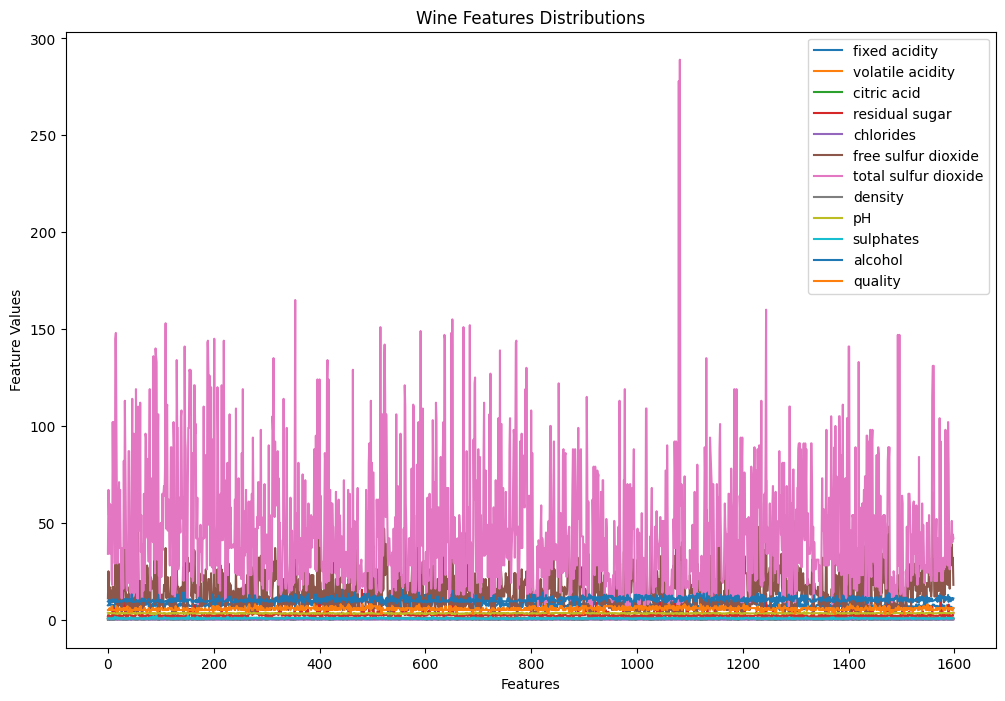

In [14]:
plt.figure(figsize=(12,8))
plt.plot(df) #Add some lines to format this graph well, I wanna just check your learnings. :)
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.title('Wine Features Distributions')
plt.legend(df.columns)
plt.show()

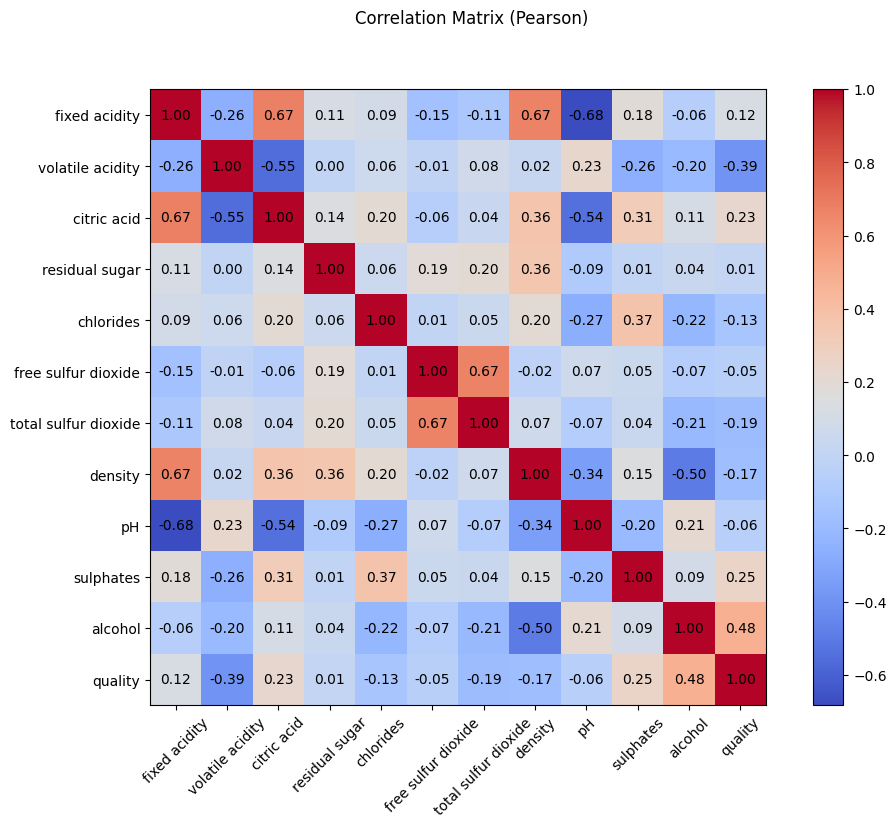

In [15]:
plt.figure(figsize=(12,8))
correlation_matrix = df.corr(method='pearson')

# Create a heatmap of the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

# Add column and row labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add data values to each cell
for i in range(len(correlation_matrix.columns)):
  for j in range(len(correlation_matrix.columns)):
    plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

plt.suptitle('Correlation Matrix (Pearson)')
plt.grid(False)
plt.show()

# You can start writing your code from here.

In [16]:
df=np.array(df)

In [17]:
m,n=df.shape

In [18]:
df

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [19]:
np.random.shuffle(df)

In [20]:
df

array([[ 9.7 ,  0.69,  0.32, ...,  0.62, 10.1 ,  5.  ],
       [ 6.9 ,  0.55,  0.15, ...,  0.59, 10.1 ,  5.  ],
       [10.2 ,  0.42,  0.57, ...,  0.63,  9.6 ,  5.  ],
       ...,
       [ 8.3 ,  0.33,  0.42, ...,  0.77, 12.7 ,  7.  ],
       [ 8.3 ,  0.65,  0.1 , ...,  0.55,  9.5 ,  5.  ],
       [ 9.7 ,  0.66,  0.34, ...,  0.66, 10.1 ,  5.  ]])

In [21]:
df.shape

(1599, 12)

In [22]:
data_test=df[0:200].T

In [23]:
data_test

array([[ 9.7 ,  6.9 , 10.2 , ...,  7.8 ,  7.2 ,  8.4 ],
       [ 0.69,  0.55,  0.42, ...,  0.59,  0.38,  0.62],
       [ 0.32,  0.15,  0.57, ...,  0.33,  0.31,  0.12],
       ...,
       [ 0.62,  0.59,  0.63, ...,  0.54,  0.76,  0.89],
       [10.1 , 10.1 ,  9.6 , ...,  9.4 , 11.3 , 11.8 ],
       [ 5.  ,  5.  ,  5.  , ...,  5.  ,  8.  ,  6.  ]])

In [24]:
X_test=data_test[:-1]
Y_test=data_test[-1]


In [25]:
# Y_test

In [26]:
data_train=df[200:m].T

In [27]:
data_train

array([[ 7.8 ,  8.7 ,  8.3 , ...,  8.3 ,  8.3 ,  9.7 ],
       [ 0.5 ,  0.46,  0.54, ...,  0.33,  0.65,  0.66],
       [ 0.12,  0.31,  0.28, ...,  0.42,  0.1 ,  0.34],
       ...,
       [ 0.87,  0.74,  0.61, ...,  0.77,  0.55,  0.66],
       [ 9.8 ,  9.6 , 10.  , ..., 12.7 ,  9.5 , 10.1 ],
       [ 6.  ,  5.  ,  6.  , ...,  7.  ,  5.  ,  5.  ]])

In [28]:
X_train=data_train[:-1]

Y_train=data_train[-1]


In [29]:
Y_train.shape

(1399,)

In [30]:
X_train.shape

(11, 1399)

In [31]:
def init_params():
    W1 = np.random.randn(512, 11)-0.5  #here 11 is for no of feature
    W2 = np.random.randn(512, 512)-0.5
    W3 = np.random.randn(11, 512)-0.5   #here 11 is for range 0 to 10 covered and 16 neuron in 1st layer
    b1 = np.random.randn(512, 1)-0.5  # Bias for hidden layer 
    b2= np.random.randn(512, 1)-0.5
    b3= np.random.randn(11, 1)-0.5  # Bias for output layer
    return W1, b1, W2, b2,W3,b3

In [32]:
def ReLU(Z):
    return np.maximum(Z,0)

In [33]:
def softmax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_values = np.exp(Z_shifted)  # Exponentiate the shifted inputs
    probabilities = exp_values / np.sum(exp_values, axis=0, keepdims=True)  # Normalize
    return probabilities

In [34]:
def forward_prop(W1,b1,W2,b2,W3,b3,X):  
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)  # Apply ReLU activation
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)  # Apply ReLU activation
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)  # Apply softmax activation
    return Z1, A1, Z2, A2,Z3,A3

In [35]:
Y_train.max()

8.0

In [36]:
def one_hot(Y):
    Y=Y.flatten().astype(int)
    one_hot_Y=np.zeros((Y.size,11),dtype=int)  #first create array of 41000,10 shape
    one_hot_Y[np.arange(Y.size),Y]=1  #np.arange(Y.size) creates an array/list of (41000, )size and 'Y' gives the value at which 1 needs to be placed
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

In [37]:
def ReLU_derivative(Z):
    return Z>0
    

In [38]:
def back_prop(Z1,A1,W1,Z2,A2,W2,Z3,A3,W3,X,Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    # print(f"A2={A2.shape}")
    # print(f"Y={Y.shape}")
    # print(f"one_hot_Y={one_hot_Y.shape}")
    dZ3=A3-one_hot_Y
    dW3=1/m*(dZ3.dot(A2.T))
    dB3=1/m*(np.sum(dZ3,axis=1, keepdims=True))

    dZ2=W3.T.dot(dZ3)*ReLU_derivative(Z2)
    dW2=1/m*(dZ2.dot(A1.T))
    dB2=1/m*(np.sum(dZ2))

    dZ1=W2.T.dot(dZ2)*ReLU_derivative(Z1)
    dW1=1/m*(dZ1.dot(X.T))
    dB1=1/m*(np.sum(dZ1))

    return dW1,dB1,dW2,dB2,dW3,dB3

In [39]:
def update_params(W1,B1,W2,B2,W3,B3,dW1,dB1,dW2,dB2,dW3,dB3,alpha):
    W1=W1-alpha*dW1
    B1=B1-alpha*dB1
    W2=W2-alpha*dW2
    B2=B2-alpha*dB2
    W3=W3-alpha*dW3
    B3=B3-alpha*dB3
    return W1,B1,W2,B2,W3,B3

In [40]:
def get_preds(A3):
    return np.argmax(A3,0)
def get_accuracy(predictions,Y):
    print(f'prediction:{predictions}, Y:{Y}')
    return np.sum(predictions==Y)/Y.size

In [41]:
def grad_desc(X,Y,iterations,alpha):
    w1,b1,w2,b2,w3,b3=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2,Z3,A3=forward_prop(w1,b1,w2,b2,w3,b3,X)
        dW1,dB1,dW2,dB2,dW3,dB3=back_prop(Z1,A1,w1,Z2,A2,w2,Z3,A3,w3,X,Y)
        w1,b1,w2,b2,w3,b3=update_params(w1,b1,w2,b2,w3,b3,dW1,dB1,dW2,dB2,dW3,dB3,alpha)
        if(i%50==0):
            print(f'iteration:{i}')
            print(f'accuracy:{get_accuracy(get_preds(A2),Y)}')
    return w1,b1,w2,b2,w3,b3

In [42]:
w1,b1,w2,b2,w3,b3=grad_desc(X_train,Y_train,500,0.1)

iteration:0
prediction:[504   0   0 ... 504   0   0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:50
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:100
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:150
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:200
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:250
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:300
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:350
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:400
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0
iteration:450
prediction:[0 0 0 ... 0 0 0], Y:[6. 5. 6. ... 7. 5. 5.]
accuracy:0.0


In [43]:
Z1, A1, Z2, A2,Z3,A3=forward_prop(w1,b1,w2,b2,w3,b3,X_test)

In [44]:
prediction=get_preds(A3)

In [45]:
prediction

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int64)

In [46]:
Y_test

array([5., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 5., 7., 5., 6., 6., 6.,
       6., 5., 5., 5., 5., 5., 6., 6., 5., 7., 6., 5., 6., 6., 5., 6., 5.,
       6., 6., 6., 6., 5., 8., 6., 6., 5., 6., 6., 5., 5., 6., 6., 6., 5.,
       6., 5., 5., 6., 5., 5., 5., 5., 6., 6., 7., 6., 6., 6., 6., 6., 7.,
       5., 5., 4., 6., 5., 5., 5., 7., 5., 6., 5., 5., 7., 6., 5., 6., 6.,
       3., 6., 5., 5., 6., 6., 4., 5., 5., 6., 7., 5., 6., 7., 5., 6., 6.,
       5., 5., 5., 6., 6., 5., 5., 4., 5., 7., 6., 5., 6., 6., 6., 6., 6.,
       6., 6., 6., 4., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 5., 5., 5.,
       7., 5., 7., 5., 5., 6., 6., 6., 5., 5., 5., 5., 5., 6., 5., 5., 8.,
       6., 6., 5., 5., 6., 5., 6., 5., 6., 5., 7., 6., 6., 6., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 6., 6., 5., 5., 8., 6.])

In [47]:
test_accuracy=np.sum(Y_test==prediction)/Y_test.size

In [48]:
print(f'test_data_accuracy = {test_accuracy*100}%')

test_data_accuracy = 44.0%


In [53]:
import numpy as np

def prepare_data(df, test_size=200):
    data_test = df[:test_size].T
    X_test = data_test[:-1]
    Y_test = data_test[-1]
    
    data_train = df[test_size:].T
    X_train = data_train[:-1]
    Y_train = data_train[-1]
    
    # Ensure Y is 1D array
    Y_train = Y_train.ravel()
    Y_test = Y_test.ravel()
    
    # Normalize the input data
    X_train = (X_train - np.mean(X_train, axis=1, keepdims=True)) / np.std(X_train, axis=1, keepdims=True)
    X_test = (X_test - np.mean(X_test, axis=1, keepdims=True)) / np.std(X_test, axis=1, keepdims=True)
    
    return X_train, Y_train, X_test, Y_test

class ImprovedNeuralNetwork:
    def __init__(self, input_size, hidden_sizes=[512, 512], output_size=11, 
                 learning_rate=0.001, l2_lambda=0.01, dropout_rate=0.2):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.l2_lambda = l2_lambda
        self.dropout_rate = dropout_rate
        self.params = self.init_params()
    
    def init_params(self):
        params = {}
        layer_sizes = [self.input_size] + self.hidden_sizes + [self.output_size]
        
        # He initialization for weights
        for i in range(len(layer_sizes) - 1):
            std = np.sqrt(2.0 / layer_sizes[i])
            params[f'W{i+1}'] = np.random.randn(layer_sizes[i+1], layer_sizes[i]) * std
            params[f'b{i+1}'] = np.zeros((layer_sizes[i+1], 1))
            
            # Batch normalization parameters
            if i < len(layer_sizes) - 2:  # No batch norm on output layer
                params[f'gamma{i+1}'] = np.ones((layer_sizes[i+1], 1))
                params[f'beta{i+1}'] = np.zeros((layer_sizes[i+1], 1))
        
        return params
    
    def update_parameters(self, grads):
        for key in self.params:
            self.params[key] -= self.learning_rate * grads[key]
            
    def get_accuracy(self, predictions, Y):
        return np.mean(predictions == Y)

    def get_predictions(self, A):
        return np.argmax(A, axis=0)

    def batch_norm_forward(self, X, gamma, beta, eps=1e-8):
        mu = np.mean(X, axis=1, keepdims=True)
        var = np.var(X, axis=1, keepdims=True) + eps
        X_norm = (X - mu) / np.sqrt(var)
        out = gamma * X_norm + beta
        cache = (X_norm, gamma, mu, var)
        return out, cache
    
    def batch_norm_backward(self, dout, cache, eps=1e-8):
        X_norm, gamma, mu, var = cache
        m = dout.shape[1]
        
        dgamma = np.sum(dout * X_norm, axis=1, keepdims=True)
        dbeta = np.sum(dout, axis=1, keepdims=True)
        dX_norm = dout * gamma
        
        dvar = np.sum(dX_norm * (X_norm - mu) * -0.5 * (var ** -1.5), axis=1, keepdims=True)
        dmu = np.sum(dX_norm * -1/np.sqrt(var), axis=1, keepdims=True)
        
        dX = (dX_norm / np.sqrt(var)) + (2 * dvar * (X_norm - mu) / m) + (dmu / m)
        
        return dX, dgamma, dbeta
    
    def dropout_forward(self, X):
        mask = (np.random.rand(*X.shape) > self.dropout_rate) / (1 - self.dropout_rate)
        out = X * mask
        return out, mask
    
    def dropout_backward(self, dout, mask):
        return dout * mask
    
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def ReLU_derivative(self, Z):
        return Z > 0
    
    def softmax(self, Z):
        Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
        exp_values = np.exp(Z_shifted)
        return exp_values / np.sum(exp_values, axis=0, keepdims=True)
    
    def forward_propagation(self, X, training=True):
        cache = {'A0': X}
        A = X
        
        # Hidden layers with BatchNorm, ReLU, and Dropout
        for i in range(len(self.hidden_sizes)):
            Z = np.dot(self.params[f'W{i+1}'], A) + self.params[f'b{i+1}']
            cache[f'Z{i+1}'] = Z
            
            # Batch normalization
            Z_norm, bn_cache = self.batch_norm_forward(
                Z, self.params[f'gamma{i+1}'], self.params[f'beta{i+1}']
            )
            cache[f'bn{i+1}'] = bn_cache
            
            # ReLU activation
            A = self.ReLU(Z_norm)
            cache[f'A{i+1}'] = A
            
            # Dropout (only during training)
            if training:
                A, mask = self.dropout_forward(A)
                cache[f'D{i+1}'] = mask
        
        # Output layer with softmax
        Z_out = np.dot(self.params[f'W{len(self.hidden_sizes)+1}'], A) + \
                self.params[f'b{len(self.hidden_sizes)+1}']
        A_out = self.softmax(Z_out)
        
        cache[f'Z{len(self.hidden_sizes)+1}'] = Z_out
        cache[f'A{len(self.hidden_sizes)+1}'] = A_out
        
        return A_out, cache
    def backward_propagation(self, Y, cache):
        m = len(Y)  # Changed from Y.shape[1]
        grads = {}
        
        # Convert Y to one-hot
        Y_one_hot = np.zeros((self.output_size, m))
        Y_one_hot[Y.astype(int), np.arange(m)] = 1
        
        # Output layer
        dZ_out = cache[f'A{len(self.hidden_sizes)+1}'] - Y_one_hot
        grads[f'W{len(self.hidden_sizes)+1}'] = (1/m) * np.dot(dZ_out, 
            cache[f'A{len(self.hidden_sizes)}'].T) + \
            (self.l2_lambda/m) * self.params[f'W{len(self.hidden_sizes)+1}']
        grads[f'b{len(self.hidden_sizes)+1}'] = (1/m) * np.sum(dZ_out, axis=1, keepdims=True)
        
        dA = np.dot(self.params[f'W{len(self.hidden_sizes)+1}'].T, dZ_out)
        
        # Hidden layers
        for i in range(len(self.hidden_sizes)-1, -1, -1):
            # Dropout gradient
            if f'D{i+1}' in cache:
                dA = self.dropout_backward(dA, cache[f'D{i+1}'])
            
            # ReLU gradient
            dZ = dA * self.ReLU_derivative(cache[f'Z{i+1}'])
            
            # Batch norm gradient
            dZ, dgamma, dbeta = self.batch_norm_backward(dZ, cache[f'bn{i+1}'])
            grads[f'gamma{i+1}'] = dgamma
            grads[f'beta{i+1}'] = dbeta
            
            # Weight and bias gradients with L2 regularization
            grads[f'W{i+1}'] = (1/m) * np.dot(dZ, cache[f'A{i}'].T) + \
                (self.l2_lambda/m) * self.params[f'W{i+1}']
            grads[f'b{i+1}'] = (1/m) * np.sum(dZ, axis=1, keepdims=True)
            
            if i > 0:
                dA = np.dot(self.params[f'W{i+1}'].T, dZ)
        
        return grads

    def compute_cost(self, A_out, Y):
        m = len(Y)  # Changed from Y.shape[1]
        Y_one_hot = np.zeros((self.output_size, m))
        Y_one_hot[Y.astype(int), np.arange(m)] = 1
        
        # Cross-entropy loss
        log_probs = -np.log(A_out + 1e-8) * Y_one_hot
        data_loss = np.sum(log_probs) / m
        
        # L2 regularization loss
        reg_loss = 0
        for i in range(len(self.hidden_sizes) + 1):
            reg_loss += np.sum(np.square(self.params[f'W{i+1}']))
        reg_loss *= (self.l2_lambda / (2*m))
        
        return data_loss + reg_loss

    def train(self, X_train, Y_train, X_val, Y_val, epochs=500, batch_size=32, print_every=50):
        m = X_train.shape[1]
        train_costs, val_costs = [], []
        train_accuracies, val_accuracies = [], []
        
        for epoch in range(epochs):
            # Mini-batch training
            permutation = np.random.permutation(m)
            X_shuffled = X_train[:, permutation]
            Y_shuffled = Y_train[permutation]
            
            for i in range(0, m, batch_size):
                X_batch = X_shuffled[:, i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]
                
                # Forward propagation
                A_out, cache = self.forward_propagation(X_batch, training=True)
                
                # Backward propagation
                grads = self.backward_propagation(Y_batch, cache)
                
                # Update parameters
                self.update_parameters(grads)
            
            if epoch % print_every == 0:
                # Compute training metrics
                A_train, _ = self.forward_propagation(X_train, training=False)
                train_cost = self.compute_cost(A_train, Y_train)
                train_accuracy = self.get_accuracy(self.get_predictions(A_train), Y_train)
                
                # Compute validation metrics
                A_val, _ = self.forward_propagation(X_val, training=False)
                val_cost = self.compute_cost(A_val, Y_val)
                val_accuracy = self.get_accuracy(self.get_predictions(A_val), Y_val)
                
                train_costs.append(train_cost)
                val_costs.append(val_cost)
                train_accuracies.append(train_accuracy)
                val_accuracies.append(val_accuracy)
                
                print(f"Epoch {epoch}")
                print(f"Training Cost: {train_cost:.4f}, Training Accuracy: {train_accuracy:.4f}")
                print(f"Validation Cost: {val_cost:.4f}, Validation Accuracy: {val_accuracy:.4f}")
                print("----------------------------------------")
        
        return train_costs, val_costs, train_accuracies, val_accuracies

# Usage
X_train, Y_train, X_test, Y_test = prepare_data(df)

# Create validation set
val_size = int(0.2 * X_train.shape[1])
X_val = X_train[:, :val_size]
Y_val = Y_train[:val_size]
X_train = X_train[:, val_size:]
Y_train = Y_train[val_size:]

# Initialize and train model
model = ImprovedNeuralNetwork(
    input_size=X_train.shape[0],
    hidden_sizes=[512, 512],
    output_size=11,
    learning_rate=0.001,
    l2_lambda=0.01,
    dropout_rate=0.2
)

# Train
train_costs, val_costs, train_accuracies, val_accuracies = model.train(
    X_train, Y_train, X_val, Y_val, epochs=500, batch_size=32, print_every=50
)

Epoch 0
Training Cost: 2.1434, Training Accuracy: 0.2313
Validation Cost: 2.2135, Validation Accuracy: 0.2258
----------------------------------------
Epoch 50
Training Cost: 0.9156, Training Accuracy: 0.6295
Validation Cost: 1.1299, Validation Accuracy: 0.5556
----------------------------------------
Epoch 100
Training Cost: 0.8556, Training Accuracy: 0.6357
Validation Cost: 1.1140, Validation Accuracy: 0.5771
----------------------------------------
Epoch 150
Training Cost: 0.8233, Training Accuracy: 0.6527
Validation Cost: 1.1112, Validation Accuracy: 0.5842
----------------------------------------
Epoch 200
Training Cost: 0.8001, Training Accuracy: 0.6696
Validation Cost: 1.1050, Validation Accuracy: 0.5878
----------------------------------------
Epoch 250
Training Cost: 0.7819, Training Accuracy: 0.6759
Validation Cost: 1.1105, Validation Accuracy: 0.5735
----------------------------------------
Epoch 300
Training Cost: 0.7693, Training Accuracy: 0.6786
Validation Cost: 1.1148, V